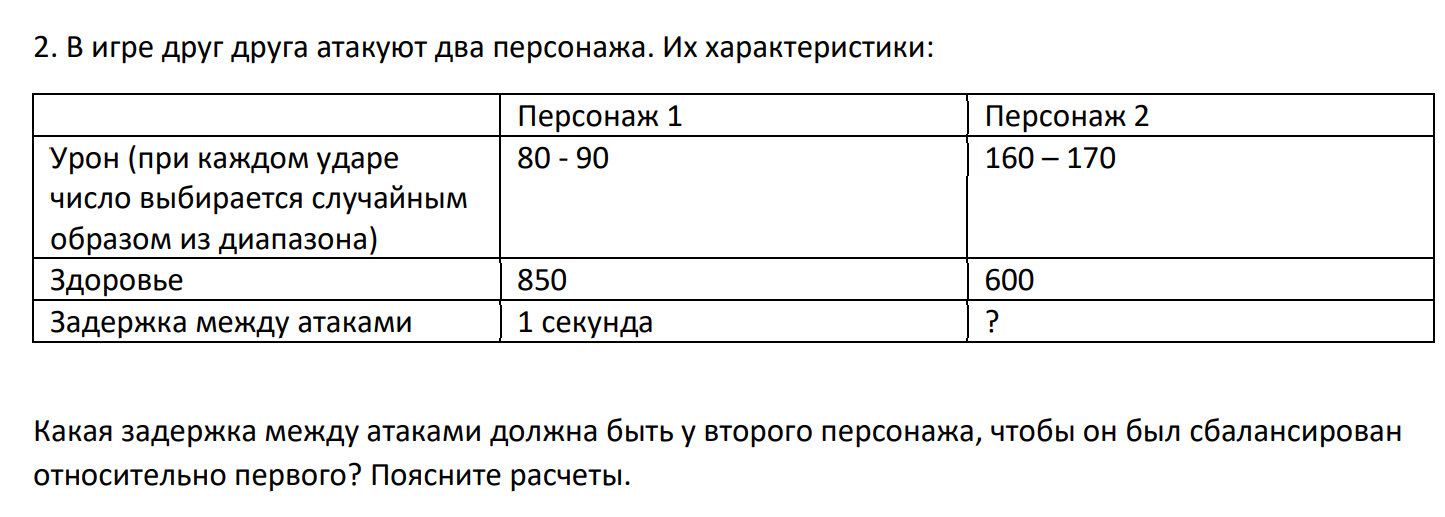

difference 1000 
mob1-mob2 392

 0.593
304 Mob 1
696 Mob 2

difference 392 
mob1-mob2 388

 0.601
306 Mob 1
694 Mob 2


 0.637
279 Mob 1
721 Mob 2

difference 388 
mob1-mob2 370

 0.699
315 Mob 1
685 Mob 2


 0.895
287 Mob 1
713 Mob 2


 0.911
290 Mob 1
710 Mob 2


 0.935
287 Mob 1
713 Mob 2


 0.94
299 Mob 1
701 Mob 2


 0.948
299 Mob 1
701 Mob 2


 0.956
304 Mob 1
696 Mob 2


 0.964
283 Mob 1
717 Mob 2


 0.972
283 Mob 1
717 Mob 2


 0.98
293 Mob 1
707 Mob 2


 0.988
309 Mob 1
691 Mob 2


 0.996
291 Mob 1
709 Mob 2


 1.17
304 Mob 1
696 Mob 2


 1.173
308 Mob 1
692 Mob 2


 1.178
293 Mob 1
707 Mob 2


 1.181
310 Mob 1
690 Mob 2


 1.186
302 Mob 1
698 Mob 2


 1.189
279 Mob 1
721 Mob 2


 1.194
296 Mob 1
704 Mob 2


 1.202
303 Mob 1
697 Mob 2


 1.205
300 Mob 1
700 Mob 2


 1.21
315 Mob 1
685 Mob 2


 1.218
287 Mob 1
713 Mob 2


 1.226
303 Mob 1
697 Mob 2

difference 370 
mob1-mob2 354

 1.234
323 Mob 1
677 Mob 2


 1.242
287 Mob 1
713 Mob 2


 1.25
296 Mob 1
704 Mob 2


 1.258
286 Mo

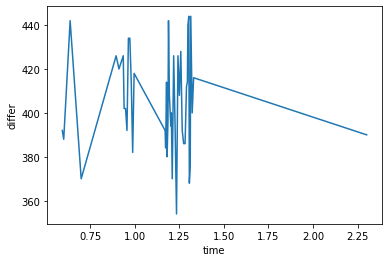

In [ ]:
import numba
import matplotlib.pyplot as plt
import random 
from random import randint
import math
import numpy as np



# mob 1 - 850 hp; damage 80-90; speed = 1 sec
# mob 2 - 600 hp; damage 160-170; speed = ?

@numba.njit
def delimeter(a, b):
    if (a < b) :
        return delimeter(b, a)
     
    # base case
    if (abs(b) < 0.001) :
        return a
    else :
        return (delimeter(b, a - math.floor(a / b) * b))

@numba.njit
def calculate(time, difference, differ_time, x , y):
    SPEED1=1
    SPEED2=time
    WinMob1=0
    WinMob2=0
    EndSteps=(delimeter(time, SPEED1))
    for i in range (1000):
        HP1=850
        HP2=600
        steps=0.0
        while HP1>0 and HP2>0:
            steps+=(EndSteps)
            steps=round(steps,4)
            
            if (steps%float(SPEED1)==0.0):
                HP2-=randint(80,90)
                
            if (steps%float(SPEED2)==0.0):
                HP1-=randint(160,170)
            
            if (HP2<=0 and HP1>0):
                WinMob1+=1
            
            elif (HP1<=0 and HP2>0):
                WinMob2+=1
            

            
    if (WinMob2!=0 and WinMob1!=0):
      x=np.append(x,time)
      y=np.append(y ,  (abs(WinMob1-WinMob2)))
      if (abs(WinMob1-WinMob2)<difference):
          print ("difference", difference , "\nmob1-mob2",abs(WinMob1-WinMob2) )
          difference= abs(WinMob1-WinMob2)
          differ_time=time
      print ("\n",time)
      print (WinMob1, "Mob 1")
      print (WinMob2,"Mob 2\n")
    return difference, differ_time, x , y

time=0.5
difference=1000
differ_time=0
x=np.array([])
y=np.array([])
while time <=5.0:
    difference, differ_time , x ,y=calculate(round(time,4), difference, differ_time, x, y)
    time+=0.001

print ("time", differ_time,"\ndifference", difference)
plt.plot(x, y)
plt.xlabel('time')
plt.ylabel('differ')
plt.show()